# Module 1: TRANSACTIONS

## Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## FUNCTIONS

In [2]:
def disto_bars(colname, df):
    # Check for missing values
    print(f'There are {df[colname].isna().sum()} missing entries for {colname}.')

    # Plot distribution
    value_counts = df[colname].value_counts(dropna=False).sort_index()

    plt.figure()
    plt.bar(value_counts.index.astype(str), value_counts.values)
    #plt.text(value_counts.index.astype(str)[-1], value_counts.values[-1]+100, str(value_counts.values[1]), color='red')
    plt.xticks(rotation=90)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title('Counts per category')
    plt.show()

In [3]:
def disto_histo(colname, df, bins=30):
    # Check for missing values
    print(f'There are {df[colname].isna().sum()} missing values for {colname}.')
    # Histogram
    plt.figure()
    plt.hist(df[colname], bins)
    plt.xlabel(colname)
    plt.ylabel('count')
    plt.title('Distribution of values for ' + colname)
    plt.show()

## Load `transactions` table

In [4]:
transactions = pd.read_csv('transactions.csv')

## Identify issues with table

In [5]:
# Rename columns
transactions.columns = transactions.loc[0]

# Remove first row
transactions.drop(0, inplace=True)

In [6]:
display(transactions.head())

,0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


### `transaction_id`

For this column, 2 important considerations are that:
- values are unique integers
- there is a `transaction_id` associated with each transaction (no null values)  

The `transaction_id` values will be set as index for the dataframe for convenience.

In [7]:
# Check for duplications
print(f'There are {transactions.transaction_id.duplicated().sum()} duplicated transaction IDs.')
# Check for missing values
print(f'There are {transactions.transaction_id.isna().sum()} missing transaction IDs.')

There are 0 duplicated transaction IDs.
There are 0 missing transaction IDs.


In [8]:
transactions.set_index('transaction_id', inplace=True)

### `product_id`

Verify the distribution of product IDs and potential erroneous or missing values. Flag problematic rows.

There are 0 missing entries for product_id.


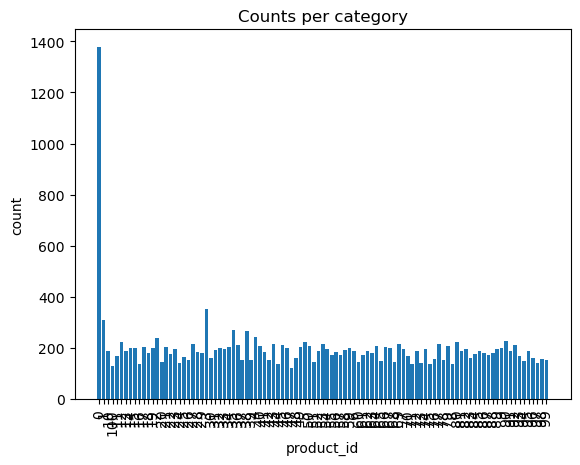

In [9]:
disto_bars('product_id', transactions)

<div class="alert alert-danger">
    <strong>FLAG:</strong> Product ID of 0 is suspicious especially considering that there are different brands corresponding to the same product id of 0. These entries should definitely be flagged as suspicious.
</div>

### `customer_id`

Verify the distribution of customer IDs and potential erroneous or missing values. Flag problematic rows.

In [10]:
transactions['customer_id'] = transactions['customer_id'].astype(int)

In [11]:
# Check for missing values
print(f'There are {transactions.customer_id.isna().sum()} missing customer IDs.')

There are 0 missing customer IDs.


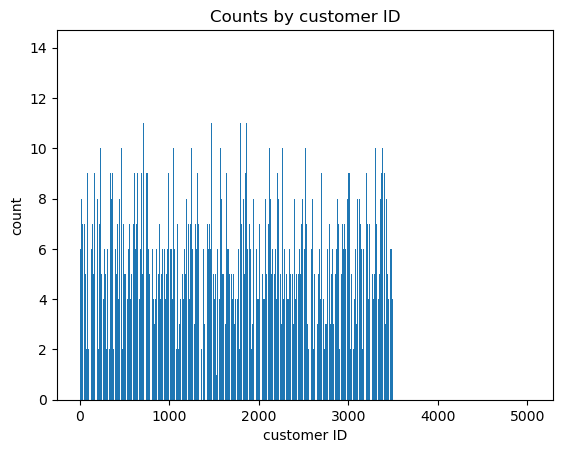

In [12]:
value_counts = transactions['customer_id'].value_counts().sort_index()

plt.figure()
plt.bar(value_counts.index, value_counts.values)
# plt.axvline(3500, color='red', linestyle=':')
plt.xlabel('customer ID')
plt.ylabel('count')
plt.title('Counts by customer ID')
plt.show()

The customer ID numbers seem to be contiguous until about 3500. Let us zoom in to see what occurs past customer ID 3500

In [13]:
transactions[transactions.customer_id>3500]

,0,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
transaction_id,,,,,,,,,,,,,
8708,8708,0,5034,2017-10-07 00:00:00,False,Approved,Solex,Road,medium,medium,416.98,312.7350159,42218
16701,16701,0,5034,2017-01-27 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,360.4,270.2999878,35667
17469,17469,0,5034,2017-01-03 00:00:00,False,Approved,OHM Cycles,Road,medium,medium,742.54,667.4000244,33879


We have a single customer 5034 who bought 3 products (supposedly).

<div class="alert alert-warning">
    <strong>Recommendation:</strong> Keep customer IDs in sequential order.
</div>

### `transaction_date`  

Verify the date is in the right format and whether there are any missing dates.

In [14]:
transactions.transaction_date = pd.to_datetime(transactions.transaction_date)

In [15]:
# Check for missing values
print(f'There are {transactions.transaction_date.isna().sum()} missing transaction dates.')

There are 0 missing transaction dates.


### `online_order`

One would expect the categories for `online_order` to be only one of 2 values: True or False. No null values should be present.

In [16]:
# Check for missing values
print(f'There are {transactions.online_order.isna().sum()} missing entries about whether or not the order was done online.')

There are 360 missing entries about whether or not the order was done online.


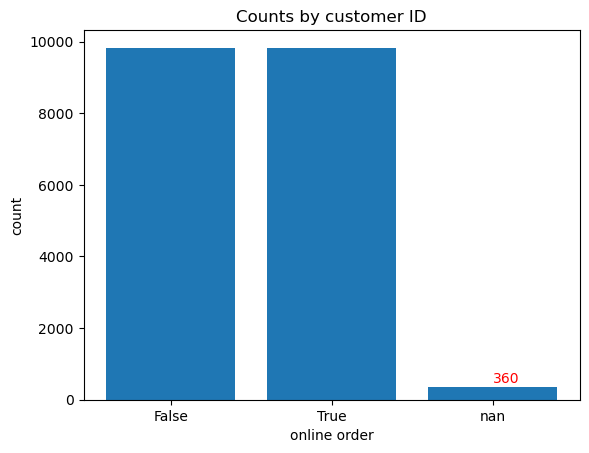

In [17]:
value_counts = transactions['online_order'].value_counts(dropna=False).sort_index()

plt.figure()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.text(value_counts.index.astype(str)[2], value_counts.values[2]+100, str(value_counts.values[2]), color='red')
plt.xlabel('online order')
plt.ylabel('count')
plt.title('Counts by customer ID')
plt.show()

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 360 missing values for whether the order was made online. These values will have to be imputed.
</div>

### `order_status`

One would expect the categories for `online_order` to be only one of 2 values: True or False. No null values should be present.

In [18]:
# Check for missing values
print(f'There are {transactions.order_status.isna().sum()} missing entries about the status of the order.')

There are 0 missing entries about the status of the order.


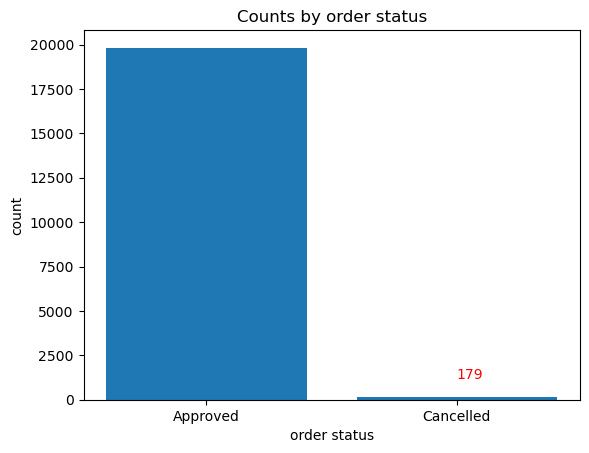

In [19]:
value_counts = transactions['order_status'].value_counts(dropna=False).sort_index()

plt.figure()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.text(value_counts.index.astype(str)[1], value_counts.values[1]+1000, str(value_counts.values[1]), color='red')
plt.xlabel('order status')
plt.ylabel('count')
plt.title('Counts by order status')
plt.show()

>There are 179 cancelled orders which is very little compared to approved orders. This represents a huge imbalance for future modelling and will likely have to be dealt with appropriately based on other information.

### `brand`

There are 197 missing entries for brand.


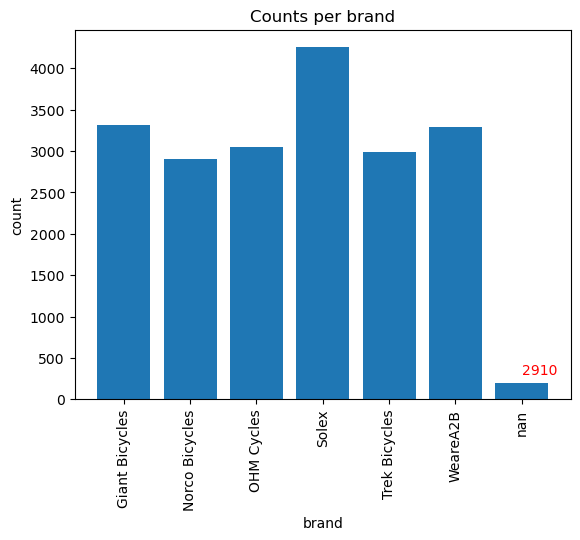

In [20]:
# Check for missing values
print(f'There are {transactions.brand.isna().sum()} missing entries for brand.')

# Plot distribution
value_counts = transactions['brand'].value_counts(dropna=False).sort_index()

plt.figure()
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.text(value_counts.index.astype(str)[-1], value_counts.values[-1]+100, str(value_counts.values[1]), color='red')
plt.xticks(rotation=90)
plt.xlabel('brand')
plt.ylabel('count')
plt.title('Counts per brand')
plt.show()

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 2910 missing values for the brand. These values will have to be imputed.
</div>

### `product_line`

There are 197 missing entries for product_line.


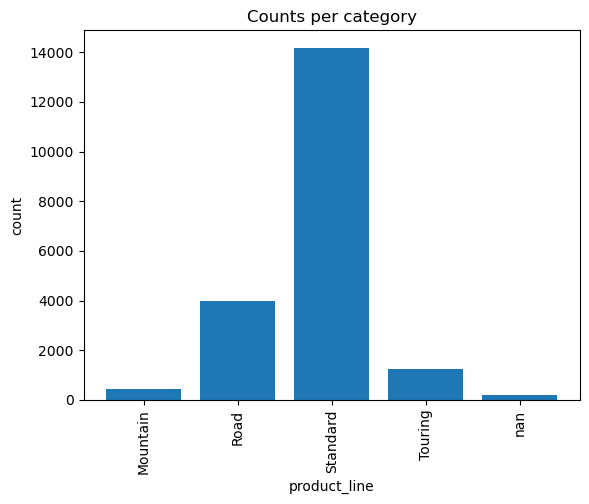

In [197]:
disto_bars('product_line', transactions)

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 197 missing values for the product line. These values will have to be imputed.
</div>

### `product_class`

There are 197 missing entries for product_class.


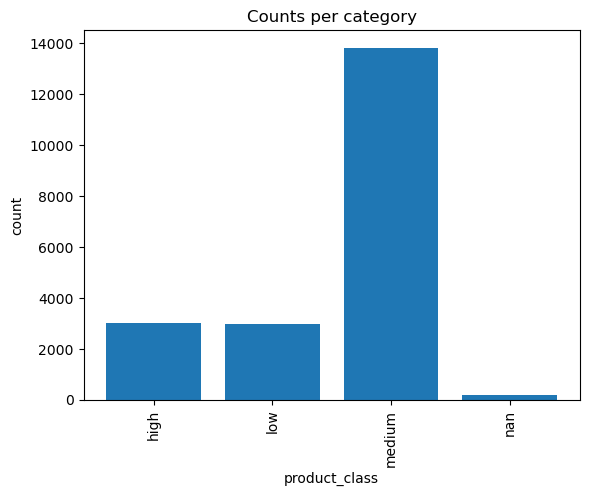

In [198]:
disto_bars('product_class', transactions)

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 197 missing values for the product line. These values will have to be imputed.
</div>

### `product_size`

There are 197 missing entries for product_size.


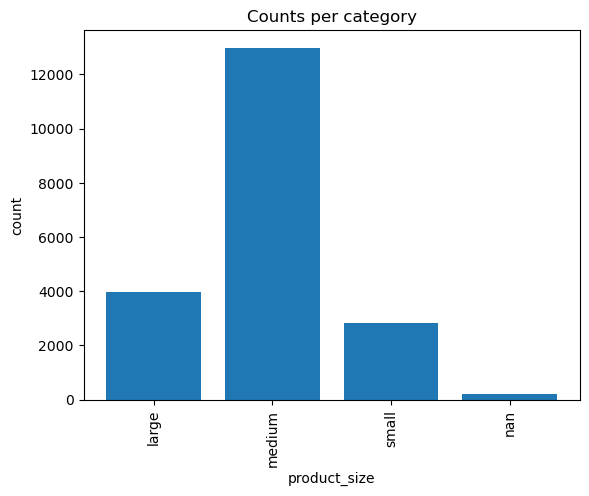

In [199]:
disto_bars('product_size', transactions)

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 197 missing values for the product line. These values will have to be imputed.
</div>

### `list_price`

There are 0 missing values for list_price.


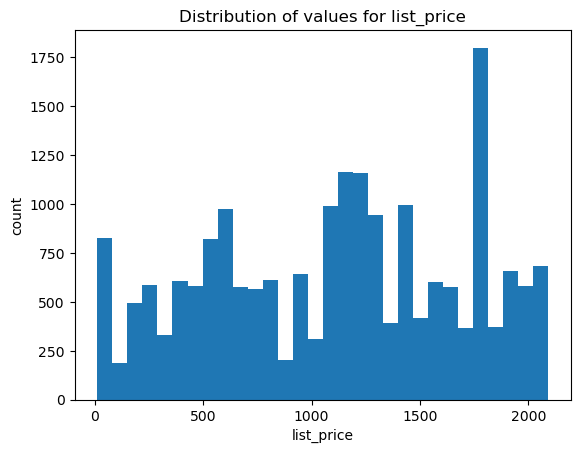

In [206]:
transactions['list_price'] = transactions['list_price'].astype(float)

disto_histo('list_price', transactions)

There are no missing values. However, there is a sizable proportion that appears in the bin close to 0. Let us see how many 0 values there are.

In [203]:
transactions[transactions['list_price']==0]['list_price'].count()

0

None of the list_prices are 0.

### `standard_cost`

In [21]:
transactions['standard_cost'] = transactions['standard_cost'].astype(float)

There are 197 missing values for standard_cost.


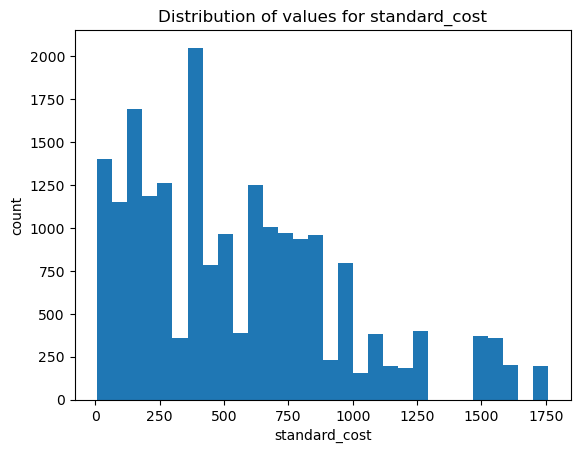

In [22]:
disto_histo('standard_cost', transactions)

<div class="alert alert-danger">
    <strong>FLAG:</strong> There are 197 missing values for the standard cost. These values will have to be imputed. Also, there is a gap between 1250 and 1500 bins for "standard_price".
</div>

### `product_first_sold_date`

Clearly, the values for this column are expected to be dates, but are integers instead. This likely represents the count in days since the origin (1900-01-01 in Excel). I assume that the origin is the origin used in Excel as the document was provided in an excel format and will therefore proceed to calculate the actual date based on this assumption.

In [208]:
# Check for nulls
print('Null values for product_first_sold_date:', transactions['product_first_sold_date'].isna().sum())

# Check for non-integer entries
non_int_entries = (transactions['product_first_sold_date'].apply(
    lambda x: not isinstance(x, int)) |\
transactions['product_first_sold_date'].apply(
    lambda x: isinstance(x, float) and not x.is_integer())
).sum()

Null values for product_first_sold_date: 197


There are only integers as dates and 197 null values.

In [209]:
# Convert to integer
transactions['product_first_sold_date'] = pd.to_numeric(
    transactions['product_first_sold_date'], errors='coerce')

transactions['date_product_first_sold'] = pd.to_datetime(
    transactions['product_first_sold_date'], 
    origin='1900-01-01', 
    unit='D', 
    errors='coerce')

# Check for nulls
print('Null values for product_first_sold_date:', transactions['date_product_first_sold'].isna().sum())

Null values for product_first_sold_date: 197


Ensure that for each product, the `date_product_first_sold` is earlier than or the same as `transaction_date`.

In [210]:
# Check if column1 dates are same as or earlier than column2
result = transactions['date_product_first_sold'] > transactions['transaction_date']

In [211]:
sum(result!=True)

20000

We can see that there are 197 entries where the date the product was first sold is later than the transaction. This is likely where there are missing values for the 2 columns.

In [212]:
display(transactions.loc[transactions['date_product_first_sold'].isna()])

,0,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,date_product_first_sold
transaction_id,,,,,,,,,,,,,,
137,137,0,431,2017-09-23,False,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN,NaT
160,160,0,3300,2017-08-27,False,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN,NaT
367,367,0,1614,2017-03-10,False,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN,NaT
407,407,0,2559,2017-06-14,True,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN,NaT
677,677,0,2609,2017-07-02,False,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19341,19341,0,443,2017-12-26,True,Approved,NaN,NaN,NaN,NaN,744.54,NaN,NaN,NaT
19384,19384,0,2407,2017-06-11,False,Approved,NaN,NaN,NaN,NaN,1098.18,NaN,NaN,NaT
19794,19794,0,2860,2017-01-13,False,Approved,NaN,NaN,NaN,NaN,868.56,NaN,NaN,NaT


## Save

In [ ]:
# Remove unnecessary columns
transactions.drop(columns=0, inplace=True)

In [216]:
# Save table
transactions.to_csv('transactions_clean1.csv')

---